In [22]:
from simulator import HathorSimulator, Miner, TxGenerator, UtterlyAcceptanceMetric
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import random

In [23]:
def run(tx_lambda):
    sim = HathorSimulator(block_weight=23.66463018297268)
    sim.ignore_update_acc_weight = True

    #m0 = Miner(hashpower=100000)
    #sim.add_miner(m0)

    g1 = TxGenerator(tx_lambda=tx_lambda, hashpower=100000)
    sim.add_tx_generator(g1)

    sim.run(3600, report_interval=3600)

    metric = UtterlyAcceptanceMetric(interval=1)
    sim.add_metric(metric)

    sim.run(3600*2, report_interval=3600)
    return sim

In [29]:
data = []

In [36]:
for tx_lambda in (32,):
    print('!!', tx_lambda)
    sim = run(tx_lambda)
    metric = sim.metrics[0]
    v = metric.values
    data.append((tx_lambda, v))

('!!', 32)
 98.72 [     7200.03] blocks=0 txs=229977 tips=61


In [30]:
for tx_lambda in (1, 2, 3, 4, 8,):
    print('!!', tx_lambda)
    sim = run(tx_lambda)
    metric = sim.metrics[0]
    v = metric.values
    data.append((tx_lambda, v))

('!!', 1)
  0.13 [     7200.70] blocks=0 txs=7224 tips=2
('!!', 2)
  0.51 [     7200.20] blocks=0 txs=14566 tips=4
('!!', 3)
  1.01 [     7200.16] blocks=0 txs=21670 tips=8
('!!', 4)
  1.04 [     7200.04] blocks=0 txs=28915 tips=4
('!!', 8)
  4.93 [     7200.17] blocks=0 txs=57331 tips=18


(0, 35)

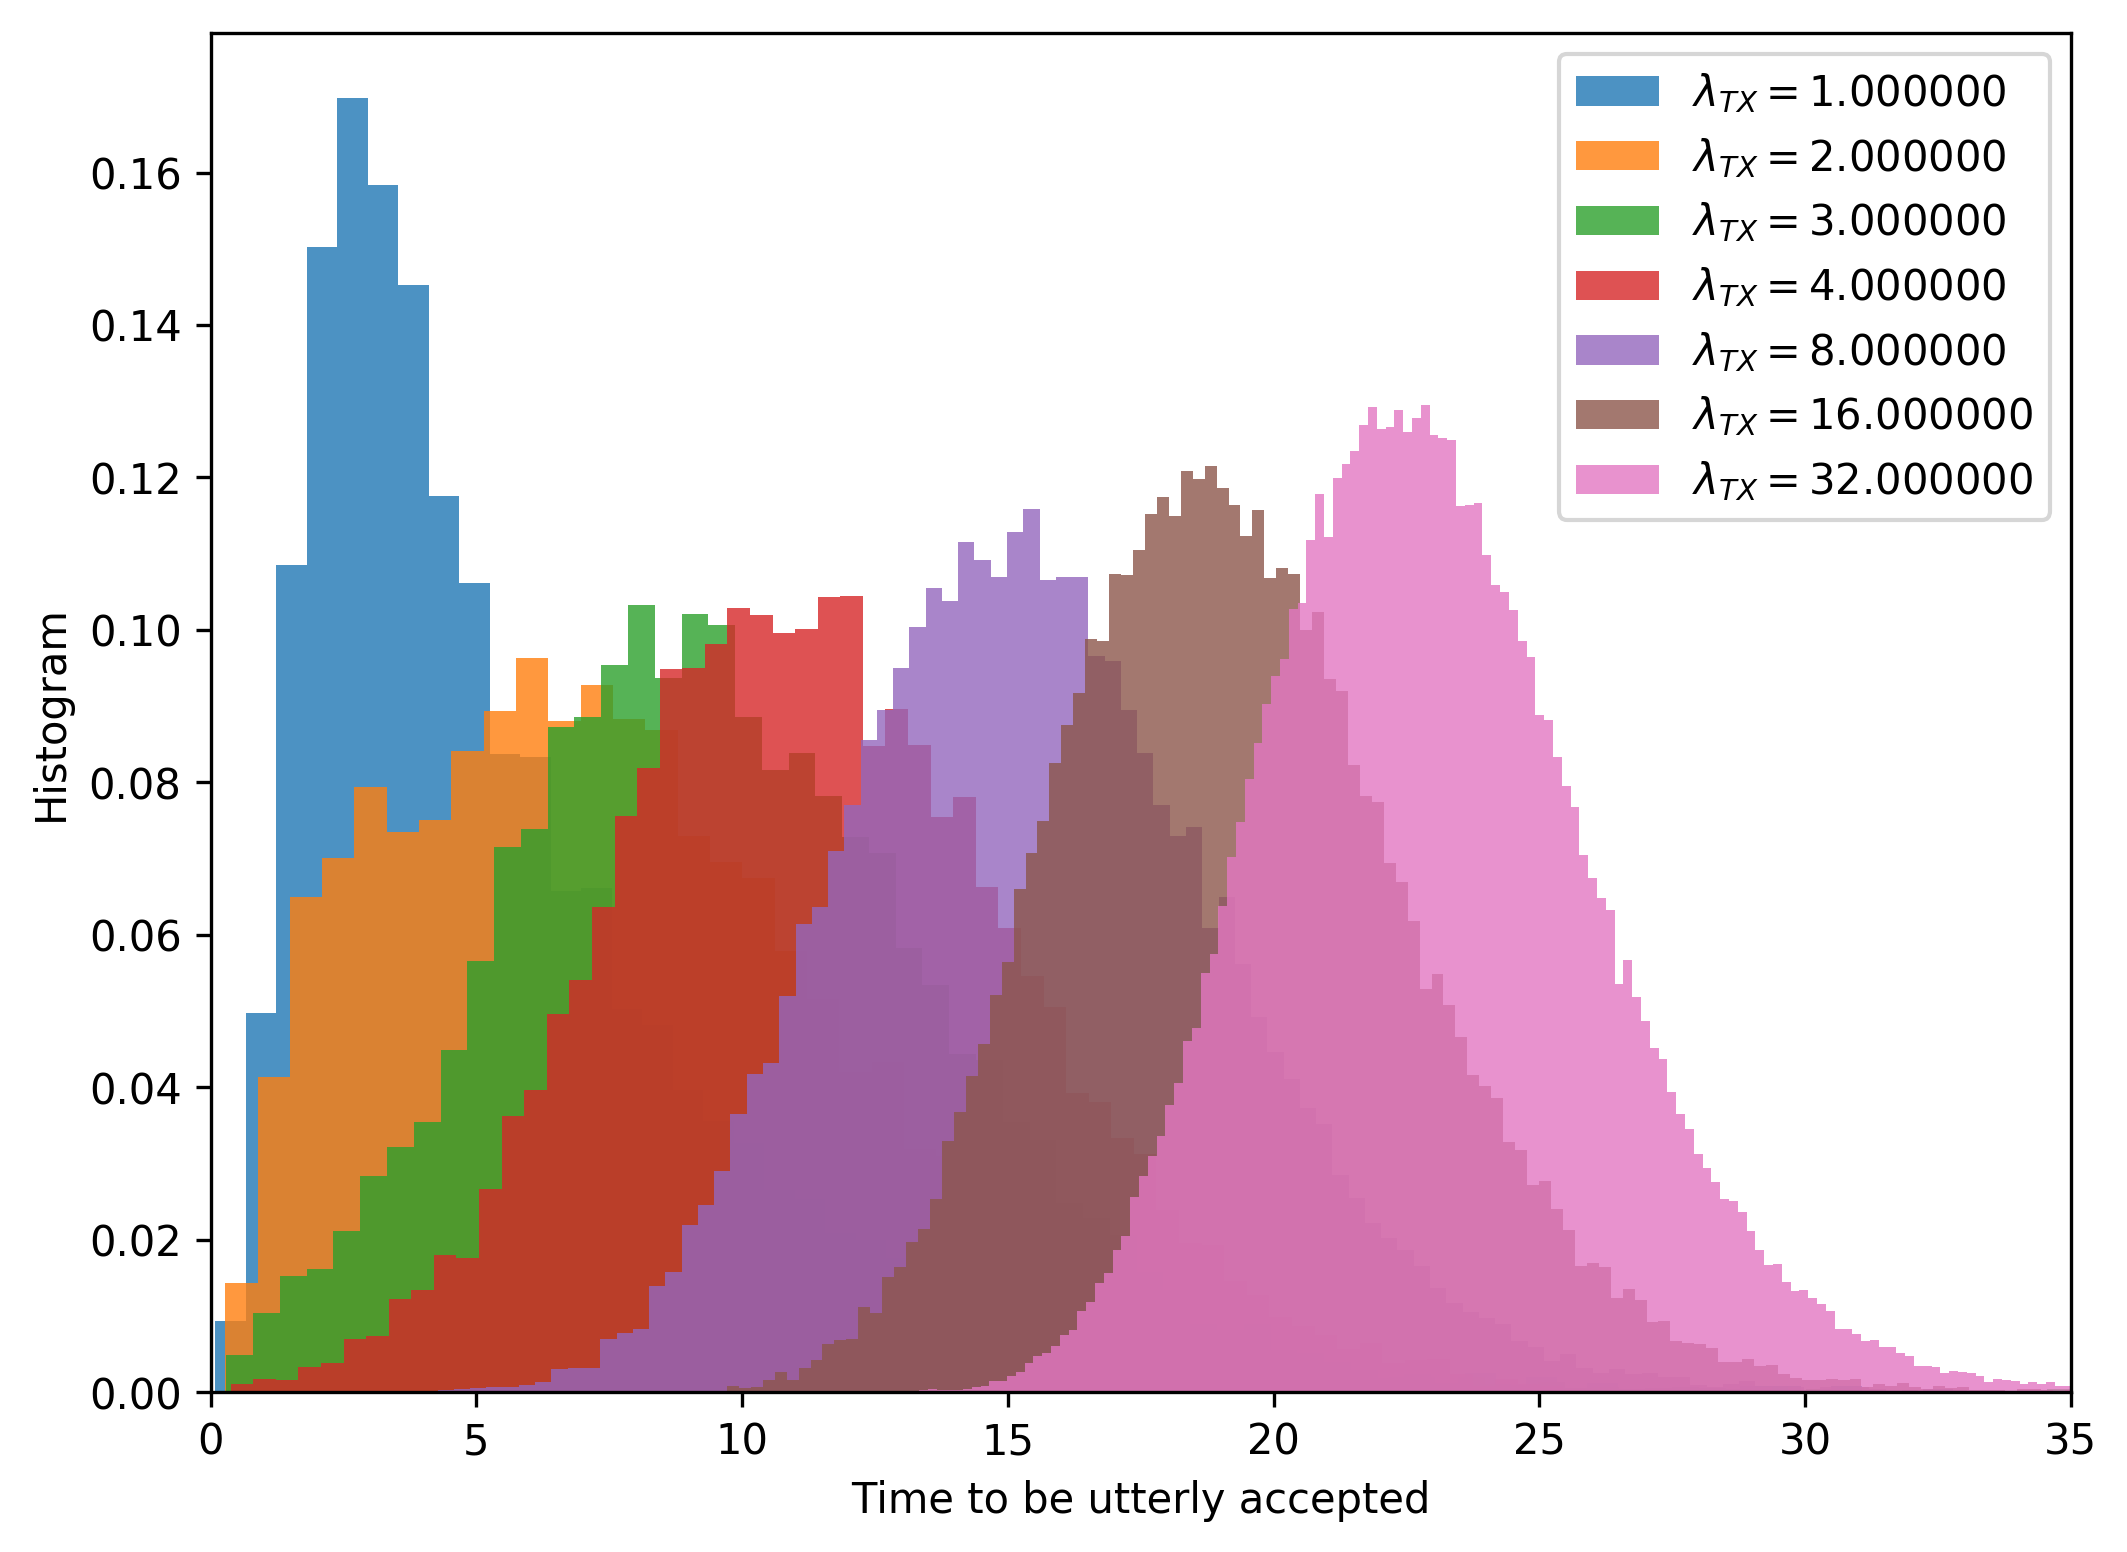

In [39]:
plt.figure(figsize=(8, 6), dpi=300)

for tx_lambda, v in data:
    bins = 'fd'
    plt.hist(v, bins=bins, density=True, alpha=0.8, label='$\lambda_{{TX}} = {:.6f}$'.format(tx_lambda));

plt.ylabel('Histogram')
plt.xlabel('Time to be utterly accepted');
plt.legend();

plt.xlim(0, 35)